<a href="https://colab.research.google.com/github/caleb-stewart/A-Z_Machine-Learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# Features is the Level
# Dependent Variable is the salary
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [4]:
# We are not splitting, because we want to levarage the maximum data from our set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [32]:
# Build a multiple linear regression model
#   But instead of x1, x2, ... we are using x1^1, x1^2, ...

# Create a matrix of power features (x1, x1^2, x1^3, ...)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # Degree is n

# Turns matrix of features into a new matrix of new features which include:
#   x1, x1^2, x1^3, ... (matrix of squared features)
X_poly = poly_reg.fit_transform(X)
# Train a new linearRegression on the matrix squared features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

Text(0, 0.5, 'Salary')

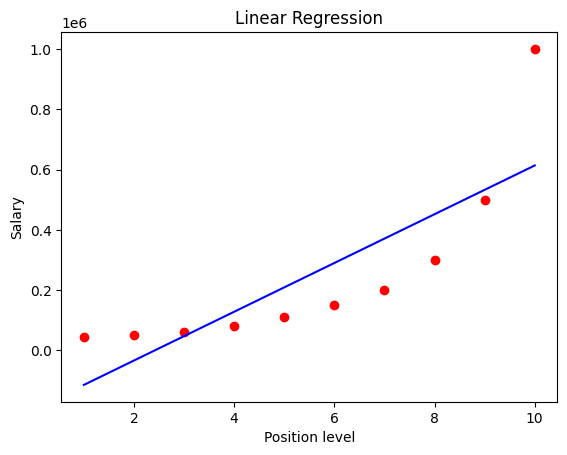

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel("Salary")

# We are plotting the linear regression (NO POLY)
# The line is not very accurate

## Visualising the Polynomial Regression results

Text(0.5, 1.0, 'Polynomial Regression')

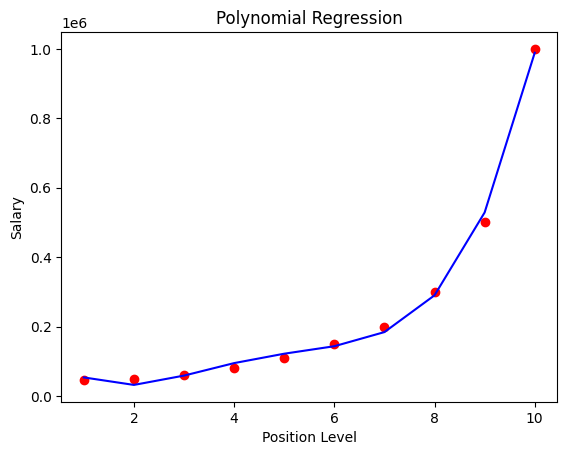

In [34]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")

# With higher degree (higher powers) we will get better results

## Predicting a new result with Linear Regression

In [21]:
# Predict the salary level of position 6.5
lin_reg.predict([[6.5]])

# Returns a totally incorrect salary

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [33]:
# Predict the salary level of position 6.5

# We cant input the exact position level, we need to input the polynomial equation
# poly_reg will do this for us with the fit_transform
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
# Returns a more accurate value

array([158862.45265155])